In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Coding\Data-Prep-EDA\Code\Data\Rotten Tomatoes Movies.csv")
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


### Explore Data:

In [3]:
df.shape

(16638, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [5]:
df["in_theaters_date"] = pd.to_datetime(df["in_theaters_date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  object        
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [6]:
df[df.in_theaters_date.dt.year>=2010].head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
97,Fireflies in the Garden,"To an outsider, the Taylors are the very pictu...","Despite boasting a stellar cast, Fireflies in ...",R,Drama,Dennis Lee (III),Dennis Lee (III),"Emily Watson, Julia Roberts, Ryan Reynolds, Wi...",2011-10-14,2012-02-07,98.0,Senator Entertainment,Rotten,22,54,45.0,45150.0
130,The Oxford Murders,When an elderly woman is viciously murdered in...,NaN,R,"Art House & International, Drama, Horror, Myst...",Álex de la Iglesia,"Álex de la Iglesia, Jorge Guerricaechevarría","Elijah Wood, John Hurt, Julie Cox, Leonor Watl...",2010-08-06,2010-10-05,110.0,Magnolia Pictures,Rotten,9,11,33.0,14548.0
155,Priest,"Priest, a western-fused post-apocalyptic thril...","Sleek and stylish, but those qualities are was...",PG-13,"Action & Adventure, Horror, Mystery & Suspense...",Scott Stewart,"Scott Stewart, Cory Goodman","Paul Bettany, Maggie Q, Cam Gigandet, Lily Col...",2011-05-13,2011-08-16,83.0,Screen Gems/SONY PICTURES,Rotten,15,99,46.0,86566.0


In [8]:
df = df[df.in_theaters_date.dt.year>=2010]
df.shape

(6053, 17)

##### Highest rated movies:

In [11]:
df.sort_values("tomatometer_rating", ascending=False).head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
3093,"Batman: The Dark Knight Returns, Part 1",It is ten years after an aging Batman has reti...,NaN,PG-13,"Action & Adventure, Animation",Jay Oliva,Bob Goodman,"Peter Weller, Ariel Winter, David Selby, Wade ...",2012-01-01,2012-09-25,134.0,WARNER BROTHERS PICTURES,Fresh,100,5,93.0,8482.0
8500,King Georges,"Philadelphia, circa 2010, is about to lose its...",NaN,NR,Documentary,Erika Frankel,NaN,"Nicholas Elmi, Daniel Boulud, Thomas Keller, E...",2016-02-26,2016-02-26,78.0,Sundance Selects,Fresh,100,9,54.0,240.0
8495,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0,65.0
8477,Killing for Love (Das Versprechen),"March 30, 1985: Derek and Nancy Haysom are dis...",NaN,NR,"Art House & International, Documentary","Karin Steinberger, Marcus Vetter","Karin Steinberger, Marcus Vetter","Daniel Brühl, Imogen Poots, Jens Söring, Gail ...",2017-12-15,2018-04-17,124.0,IFC Films,Fresh,100,9,82.0,201.0
8461,Kill Zone 2 (Saat po long 2),When an undercover cop gets too close to revea...,NaN,NR,"Action & Adventure, Art House & International,...",Pou-Soi Cheang,"Ying Wong, Lai-yin Leung","Tony Jaa, Jing Wu, Simon Yam, Zhang Jin, Louis...",2016-05-13,2016-05-13,120.0,Well Go USA,Fresh,100,22,63.0,544.0


In [12]:
df.sort_values("audience_rating", ascending=False).head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
14566,The Miners' Hymns,The ill-fated coal mining communities in North...,NaN,NR,"Documentary, Drama, Special Interest",Bill Morrison (II),"David Metcalfe, Bill Morrison (II)","Eric Leckenby, Brian Gibson, Alex Trotter, Joh...",2012-02-08,2012-10-30,52.0,Icarus Films,Fresh,100,10,100.0,148.0
9051,Little Monsters,Little Monsters follows Dave (Alexander Englan...,Led by typically outstanding work from Lupita ...,R,"Comedy, Horror",Abe Forsythe,Abe Forsythe,"Lupita Nyong'o, Alexander England, Josh Gad, K...",2019-10-08,2019-10-11,94.0,NEON/Hulu,Certified Fresh,83,94,100.0,9.0
7137,Haunt,A group of friends look for the thrill of a li...,Haunt is spooked by the spirits of its obvious...,R,"Horror, Mystery & Suspense","Scott Beck, Bryan Woods","Scott Beck, Bryan Woods","Katie Stevens, Will Brittain, Lauryn Alisa McC...",2019-09-13,2019-09-13,92.0,Momentum Pictures,Fresh,68,38,100.0,7.0
16438,Wonders of the Sea,Jean-Michel Cousteau and his children embark o...,NaN,NR,Documentary,"Jean-Jacques Mantello, Jean-Michel Cousteau","David Chocron, François Mantello, Jean-Jacques...","Arnold Schwarzenegger, Celine Cousteau, Fabien...",2019-01-17,2019-06-04,82.0,Fathom Events,Fresh,76,17,100.0,13.0
14580,The Most Dangerous Year,"As a dark wave of anti-transgender ""bathroom b...",NaN,NR,Documentary,Vlada Knowlton,Vlada Knowlton,"Vlada Knowlton, Vlada Knowlton, Annabelle Know...",2019-04-12,2019-07-09,90.0,NaN,Fresh,91,11,100.0,40.0


In [14]:
popular_movies = df[df.audience_count > 100000]
popular_movies.shape

(316, 17)

In [15]:
popular_movies.sort_values("audience_rating", ascending=False).head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
6950,Guardians of the Galaxy,"From Marvel, the studio that brought you the g...",Guardians of the Galaxy is just as irreverent ...,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"Nicole Perlman, James Gunn (II)","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01,2014-12-09,121.0,Walt Disney Pictures,Certified Fresh,91,316,92.0,254717.0
4077,Captain America: The Winter Soldier,"After being deemed unfit for military service,...","Suspenseful and politically astute, Captain Am...",PG-13,"Action & Adventure, Science Fiction & Fantasy","Joe Russo, Anthony Russo","Stephen McFeely, Christopher Markus","Chris Evans, Samuel L. Jackson, Scarlett Johan...",2014-04-04,2014-09-09,136.0,Walt Disney Pictures,Certified Fresh,90,292,92.0,281524.0
14397,The King's Speech,After the death of his father King George V (M...,Colin Firth gives a masterful performance in T...,PG-13,Drama,Tom Hooper,David Seidler,"Colin Firth, Helena Bonham Carter, Geoffrey Ru...",2010-11-26,2011-04-19,118.0,The Weinstein Company,Certified Fresh,95,292,92.0,144306.0
14549,The Martian,"During a manned mission to Mars, Astronaut Mar...","Smart, thrilling, and surprisingly funny, The ...",PG-13,Science Fiction & Fantasy,Ridley Scott,Drew Goddard,"Matt Damon, Jessica Chastain, Kristen Wiig, Je...",2015-10-02,2016-01-12,164.0,20th Century Fox,Certified Fresh,91,361,91.0,131093.0


In [16]:
popular_movies.sort_values("tomatometer_rating", ascending=False).head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
7558,How to Train Your Dragon,The son of a Viking chief must capture a drago...,"Boasting dazzling animation, a script with sur...",PG,"Animation, Kids & Family, Science Fiction & Fa...","Dean DeBlois, Chris Sanders","Chris Sanders, Dean DeBlois, William Davies","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",2010-03-26,2010-10-15,98.0,Paramount/DWA,Certified Fresh,99,208,91.0,312342.0
15416,Toy Story 3,"""Toy Story 3"" welcomes Woody, Buzz and the who...","Deftly blending comedy, adventure, and honest ...",G,"Animation, Comedy, Kids & Family",Lee Unkrich,"Lee Unkrich, Andrew Stanton, John Lasseter, Mi...","Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,...",2010-06-18,2010-11-02,103.0,Walt Disney Pictures,Certified Fresh,98,305,89.0,606931.0
7925,Inside Out,"Growing up can be a bumpy road, and it's no ex...","Inventive, gorgeously animated, and powerfully...",PG,"Animation, Kids & Family","Pete Docter, Ronnie del Carmen","Meg LeFauve, Josh Cooley, Pete Docter","Amy Poehler, Phyllis Smith, Richard Kind, Bill...",2015-06-19,2015-11-03,94.0,Disney/Pixar,Certified Fresh,98,357,89.0,136125.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0,100946.0
9355,Mad Max: Fury Road,Filmmaker George Miller gears up for another p...,With exhilarating action and a surprising amou...,R,"Action & Adventure, Science Fiction & Fantasy",George Miller,"Brendan McCarthy, Nick Lathouris, George Miller","Tom Hardy, Charlize Theron, Nicholas Hoult, Ro...",2015-05-15,2015-09-01,120.0,Warner Bros.,Certified Fresh,97,410,85.0,127428.0


In [17]:
popular_movies.rating.value_counts()

rating
PG-13    160
R        100
PG        51
G          5
Name: count, dtype: int64

In [18]:
popular_movies.groupby("rating")["audience_rating"].mean()

rating
G        66.200000
PG       66.823529
PG-13    67.293750
R        63.010000
Name: audience_rating, dtype: float64

### Creating new columns:

In [19]:
popular_movies.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
248,Tron Legacy,The Master Control Program is booted back up i...,"Tron Legacy boasts dazzling visuals, but its h...",PG,"Action & Adventure, Science Fiction & Fantasy",Joseph Kosinski,"Edward Kitsis, Adam Horowitz, Steven Lisberger...","Jeff Bridges, Garrett Hedlund, Olivia Wilde, B...",2010-12-17,2011-04-05,125.0,Walt Disney Pictures,Rotten,51,239,63.0,171385.0
265,The Last Song,Based on best-selling novelist Nicholas Sparks...,As shamelessly manipulative as any Nicholas Sp...,PG,"Drama, Kids & Family, Romance",Julie Ann Robinson,"Nicholas Sparks, Jeff Van Wie","Miley Cyrus, Greg Kinnear, Bobby Coleman, Liam...",2010-03-31,2010-08-17,107.0,Walt Disney Studios,Rotten,20,118,66.0,160777.0
274,Repo Men,"In the futuristic action-thriller ""Repo Men,"" ...","Repo Men has an intriguing premise, as well as...",R,"Action & Adventure, Science Fiction & Fantasy",Miguel Sapochnik,"Eric Garcia, Garrett Lerner","Jude Law, Forest Whitaker, Alice Braga, Liev S...",2010-03-19,2010-07-27,119.0,Universal Studios,Rotten,22,151,41.0,100453.0
284,Predators,A group of hardened killers are hunted on an a...,"After a string of subpar sequels, this bloody,...",R,"Action & Adventure, Horror, Science Fiction & ...",Nimród Antal,"Alex Litvak, Michael Finch","Adrien Brody, Topher Grace, Alice Braga, Walto...",2010-07-09,2010-10-19,107.0,20th Century Fox,Fresh,65,198,52.0,159760.0


In [20]:
popular_movies['Animation'] = np.where(popular_movies.genre.str.contains('Animation'), 1, 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_1264\2629828590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_movies['Animation'] = np.where(popular_movies.genre.str.contains('Animation'), 1, 0)


In [21]:
popular_movies = df[df.audience_count > 100000].copy()

In [22]:
popular_movies['Animation'] = np.where(popular_movies.genre.str.contains('Animation'), 1, 0)

In [23]:
popular_movies['Action & Adventure'] = np.where(popular_movies.genre.str.contains('Action & Adventure'), 1, 0)
popular_movies['Comedy'] = np.where(popular_movies.genre.str.contains('Comedy'), 1, 0)

In [24]:
popular_movies.groupby('rating')[['Animation', 'Action & Adventure', 'Comedy']].sum()

,Animation,Action & Adventure,Comedy
rating,,,
G,5,3,5
PG,26,27,29
PG-13,0,102,35
R,0,41,35


In [25]:
popular_movies.groupby('Animation')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Animation,,
0,58.340351,64.831579
1,75.258065,75.161290


In [26]:
popular_movies.groupby('Action & Adventure')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Action & Adventure,,
0,59.111888,65.391608
1,60.734104,66.219653


In [27]:
popular_movies.groupby('Comedy')[['tomatometer_rating', 'audience_rating']].mean()

,tomatometer_rating,audience_rating
Comedy,,
0,62.169811,67.353774
1,55.576923,62.769231


### Visualize Data:

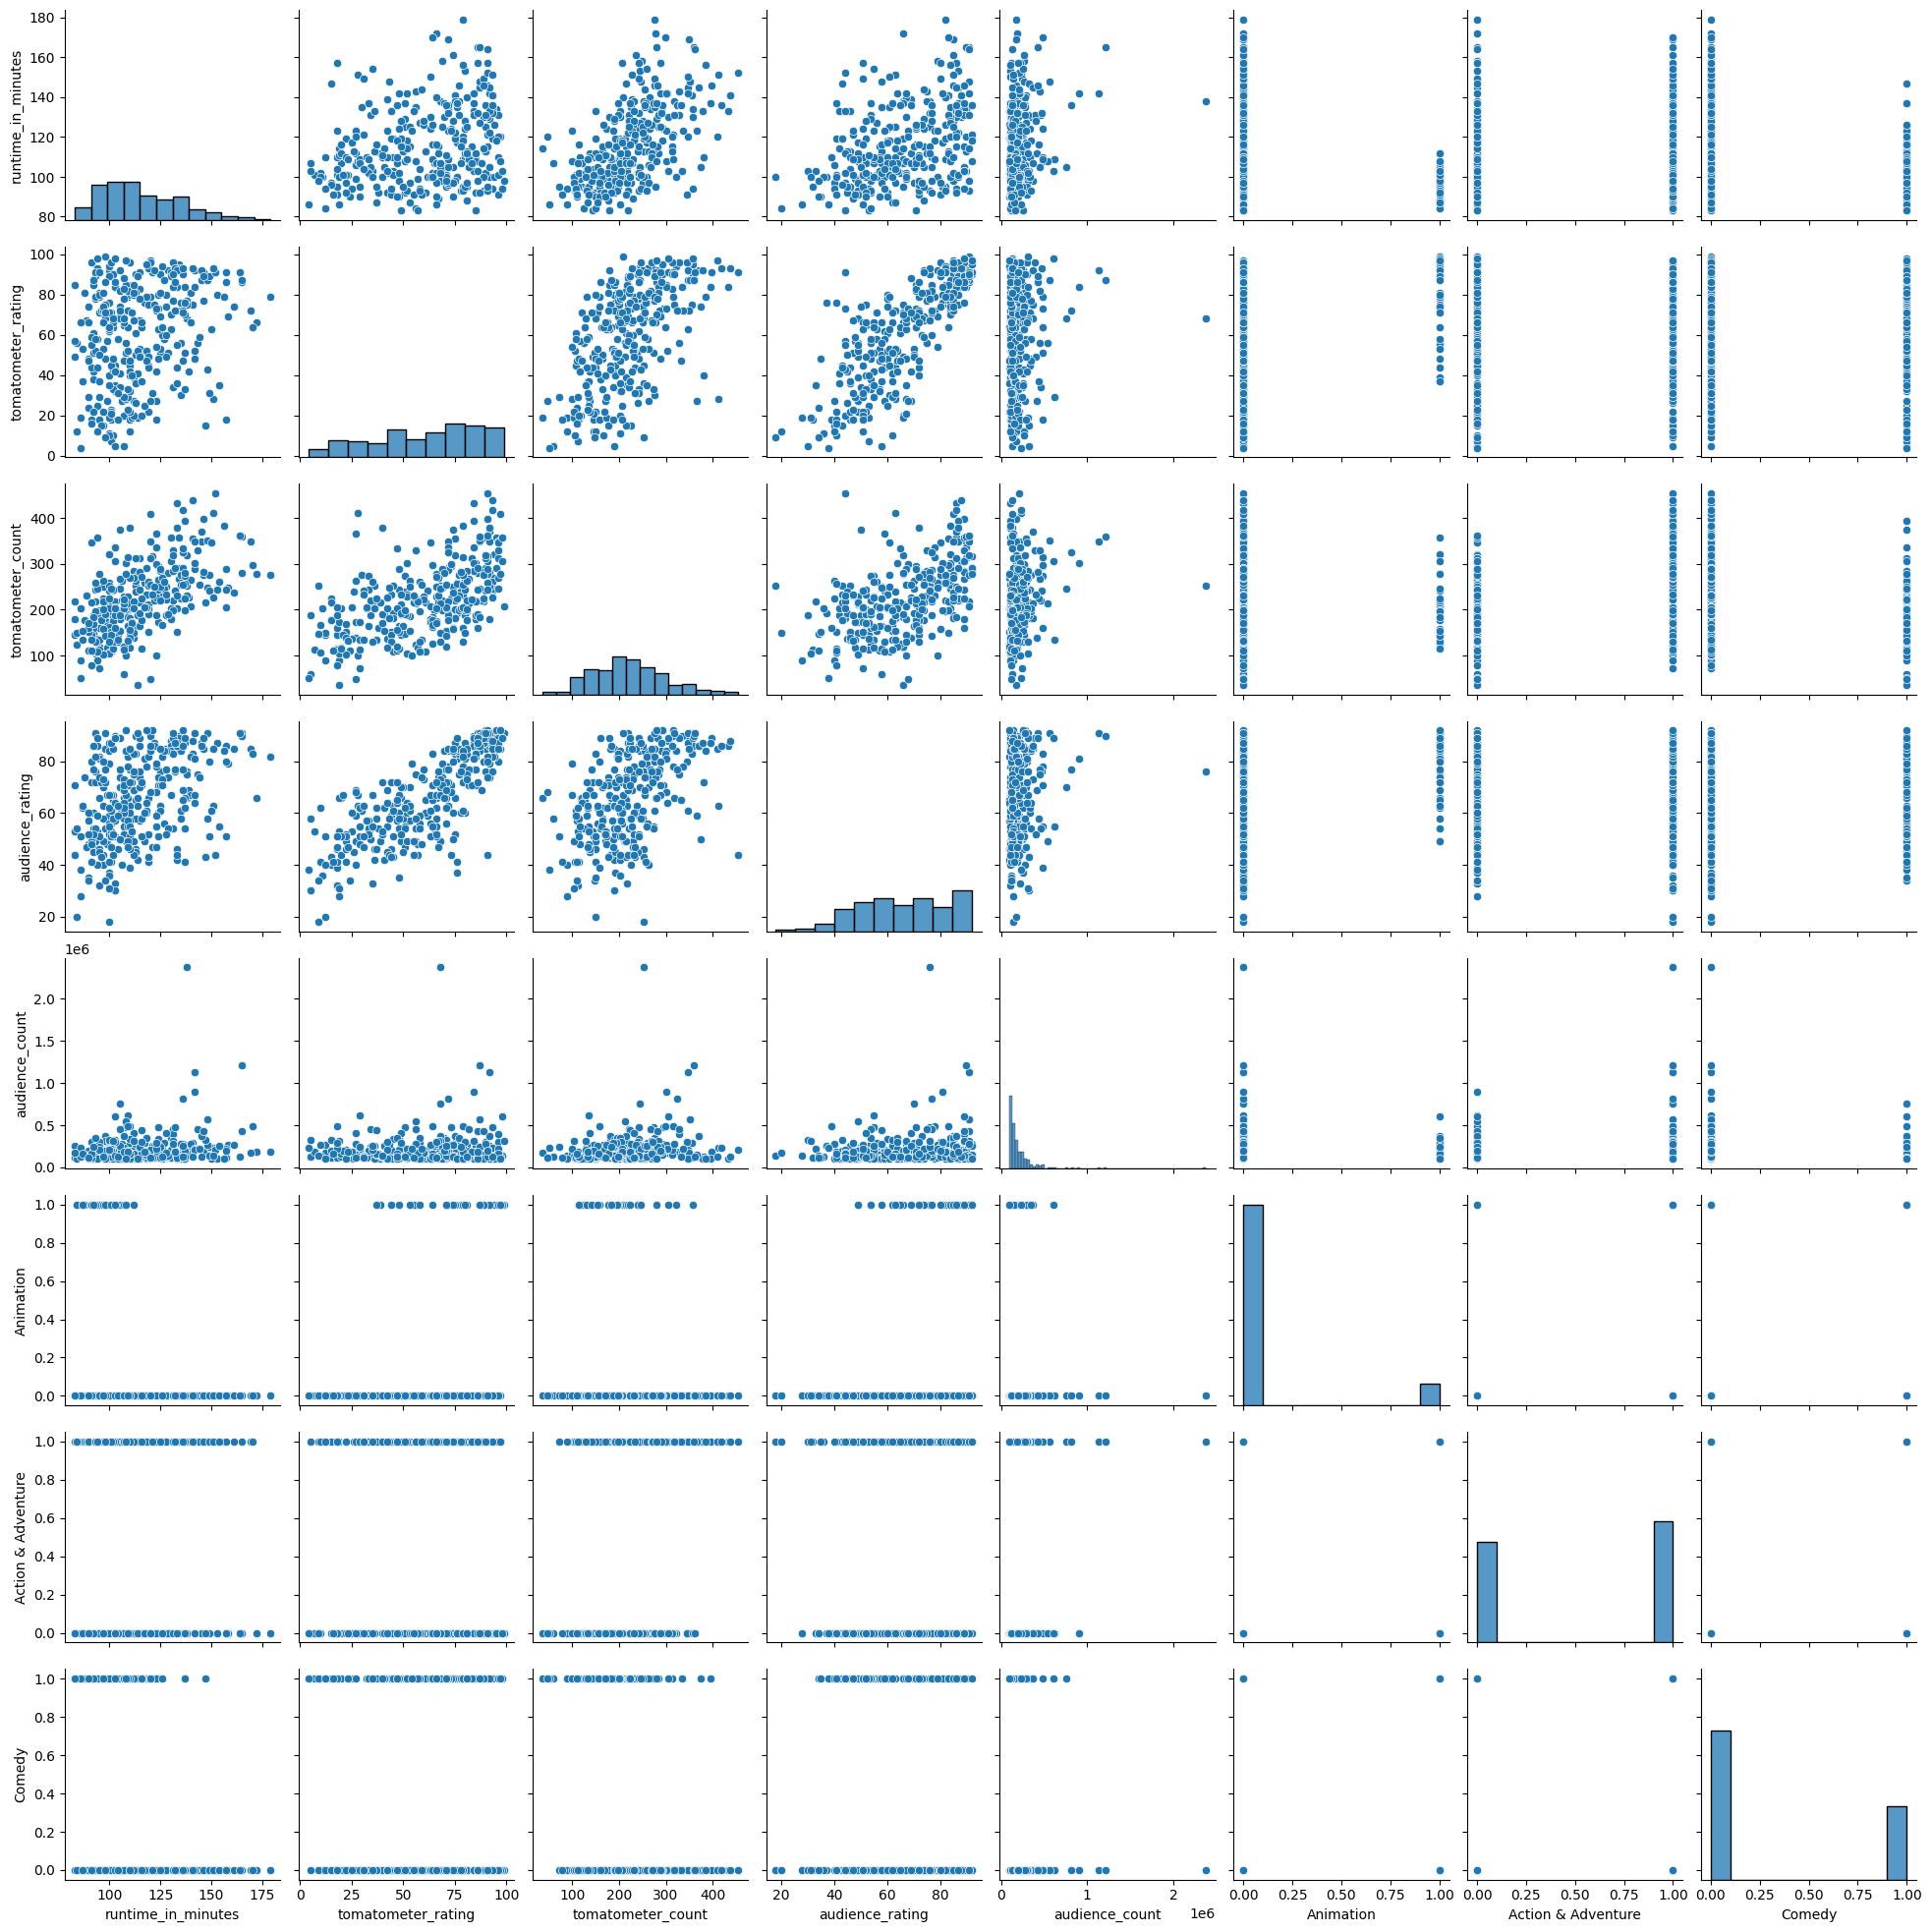

In [28]:
sns.pairplot(popular_movies)

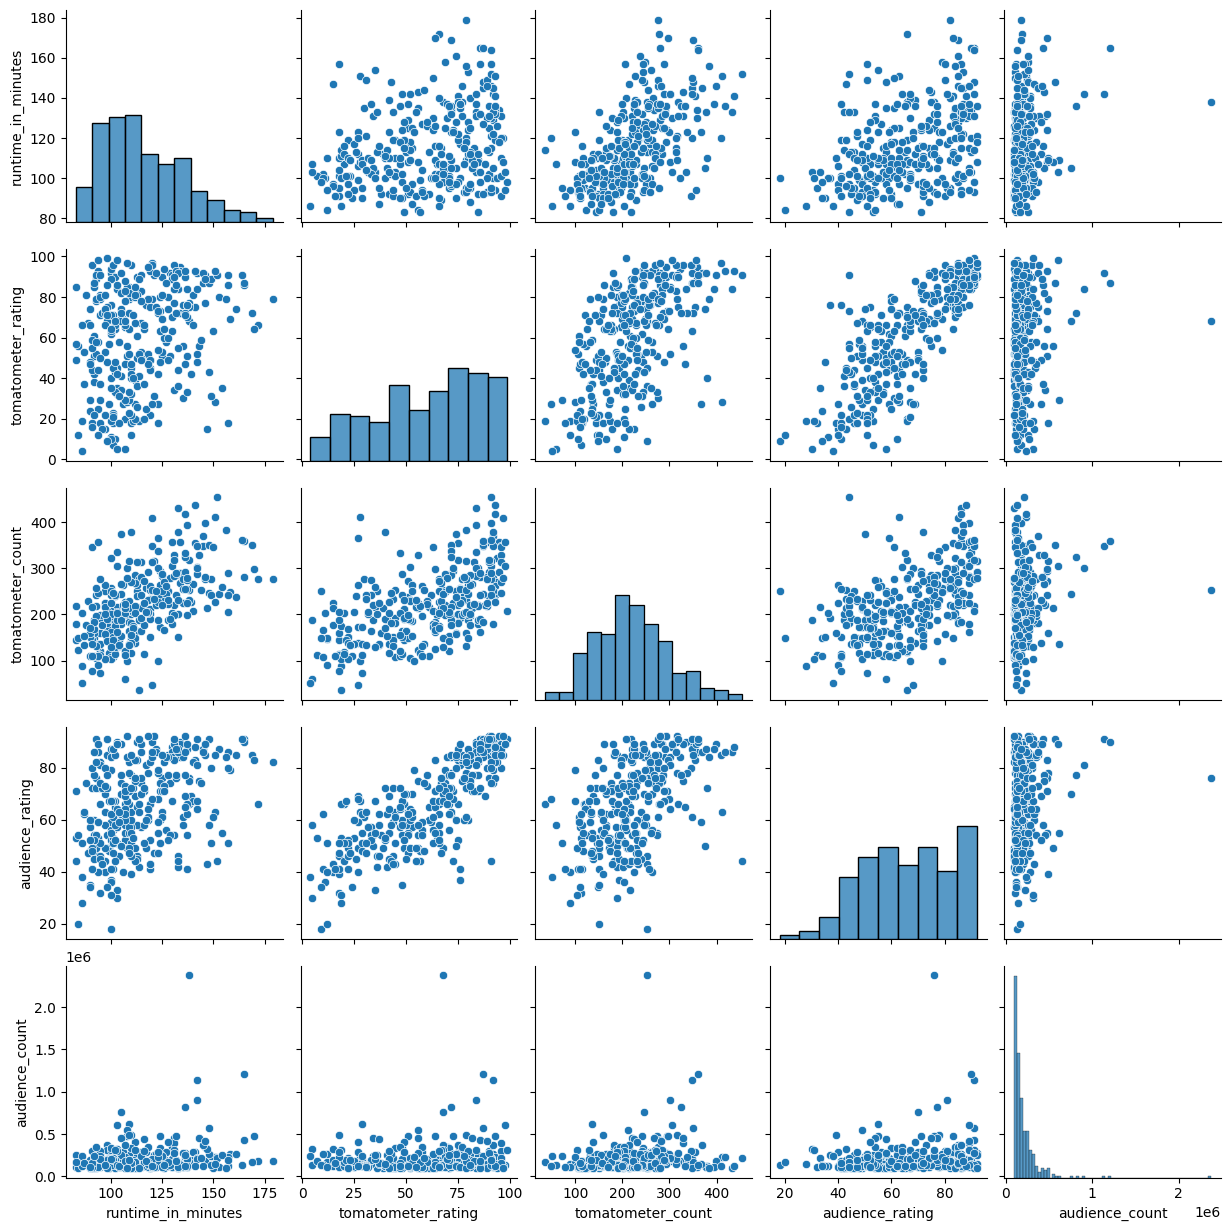

In [29]:
sns.pairplot(popular_movies.iloc[:, :-3])